# Assignment 3 Notebook

## Clustering Algorithms Comparison

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering


### Define Training and Visualization Functions

In [ ]:
def train_models(X, eps = 0.5, min_samples = 5, n_clusters = 8, max_iter = 300, random_state = 27, linkage = 'ward'):
    '''
    Trains provided data on three different clustering algorithms.
    
    Parameters:
    X : array-like, shape (n_samples, 2)
        The training data.
    eps : float
        (DBSCAN) The max distance between data points for them to be in the same neighbourhood.
    min_samples : int
        (DBSCAN) The min number of data points that need to be in a neighbourhood for a specific point to be a core point.
    n_clusters : int
        (KMeans, Agglomerative) The number of clusters/centroids.
    max_iter : int
        (KMeans) The max number of iterations of the algorithm.
    random_state : int, RandomState instance, or None
        (KMeans) Sets a random number generation for reproducibility.
    linkage : str
        (Agglomerative) Linkage method.
        
    Returns:
    Trained DBSCAN model, trained KMeans model, trained Agglomerative Model
    '''
    # train DBSCAN model
    dbscan = DBSCAN(eps = eps,
                    min_samples = min_samples 
                    )
    dbscan.fit(X)
    y_dbscan = dbscan.fit_predict(X)
    
    # train KMeans model
    kmeans = KMeans(n_clusters = n_clusters, 
                    max_iter = max_iter, 
                    random_state = random_state)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # train Hierarchical model
    agglo = AgglomerativeClustering(n_clusters = n_clusters, 
                                    linkage = linkage)
    # agglo.fit(X)
    y_agglo = agglo.fit_predict(X)
    
    return y_dbscan, y_kmeans, y_agglo


def visualize_models(X, y_dbscan, y_kmeans, y_agglo, centers = None):
    '''
    Visualize the results of the clustering models.
    
    Parameters:
    X : array-like, shape (n_samples, 2)
        The training data.
    y_dbscan : array-like, shape (n_samples, ) 
        The DBSCAN cluster labels.
    y_kmeans : array-like, shape (n_samples, ) 
        The KMeans cluster labels.
    y_agglo : array-like, shape (n_samples, ) 
        The Agglomerative cluster labels.
    
    Return
    None
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 11))

    # plot the DBSCAN results
    ax1.scatter(X[:, 0], 
                X[:, 1], 
                c = y_dbscan, 
                s = 50, 
                cmap = 'vanimo')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('DBSCAN Clustering Result')
    
    # plot the KMeans results
    ax2.scatter(X[:, 0], 
                X[:, 1], 
                c = y_kmeans, 
                s = 50, 
                cmap = 'Pastel2')
    if centers is not None:
        ax2.scatter(centers[:, 0], 
                    centers[:, 1], 
                    c = 'green', 
                    s = 200, 
                    alpha = 0.75, 
                    marker = 'X')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_title('KMeans Clustering Result')
    
    # plot the Agglomerative results
    ax3.scatter(X[:, 0], 
                X[:, 1], 
                c = y_agglo, 
                s = 50, 
                cmap = 'Pastel1')
    ax3.set_xlabel('Feature 1')
    ax3.set_ylabel('Feature 2')
    ax3.set_title('Agglomerative Clustering Result')
    
    plt.show()

### Train and Visualize Models on Dataset Where DBSCAN Excels

c:\Users\viole\Documents\School\ML-AI\BINF5507-Materials\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


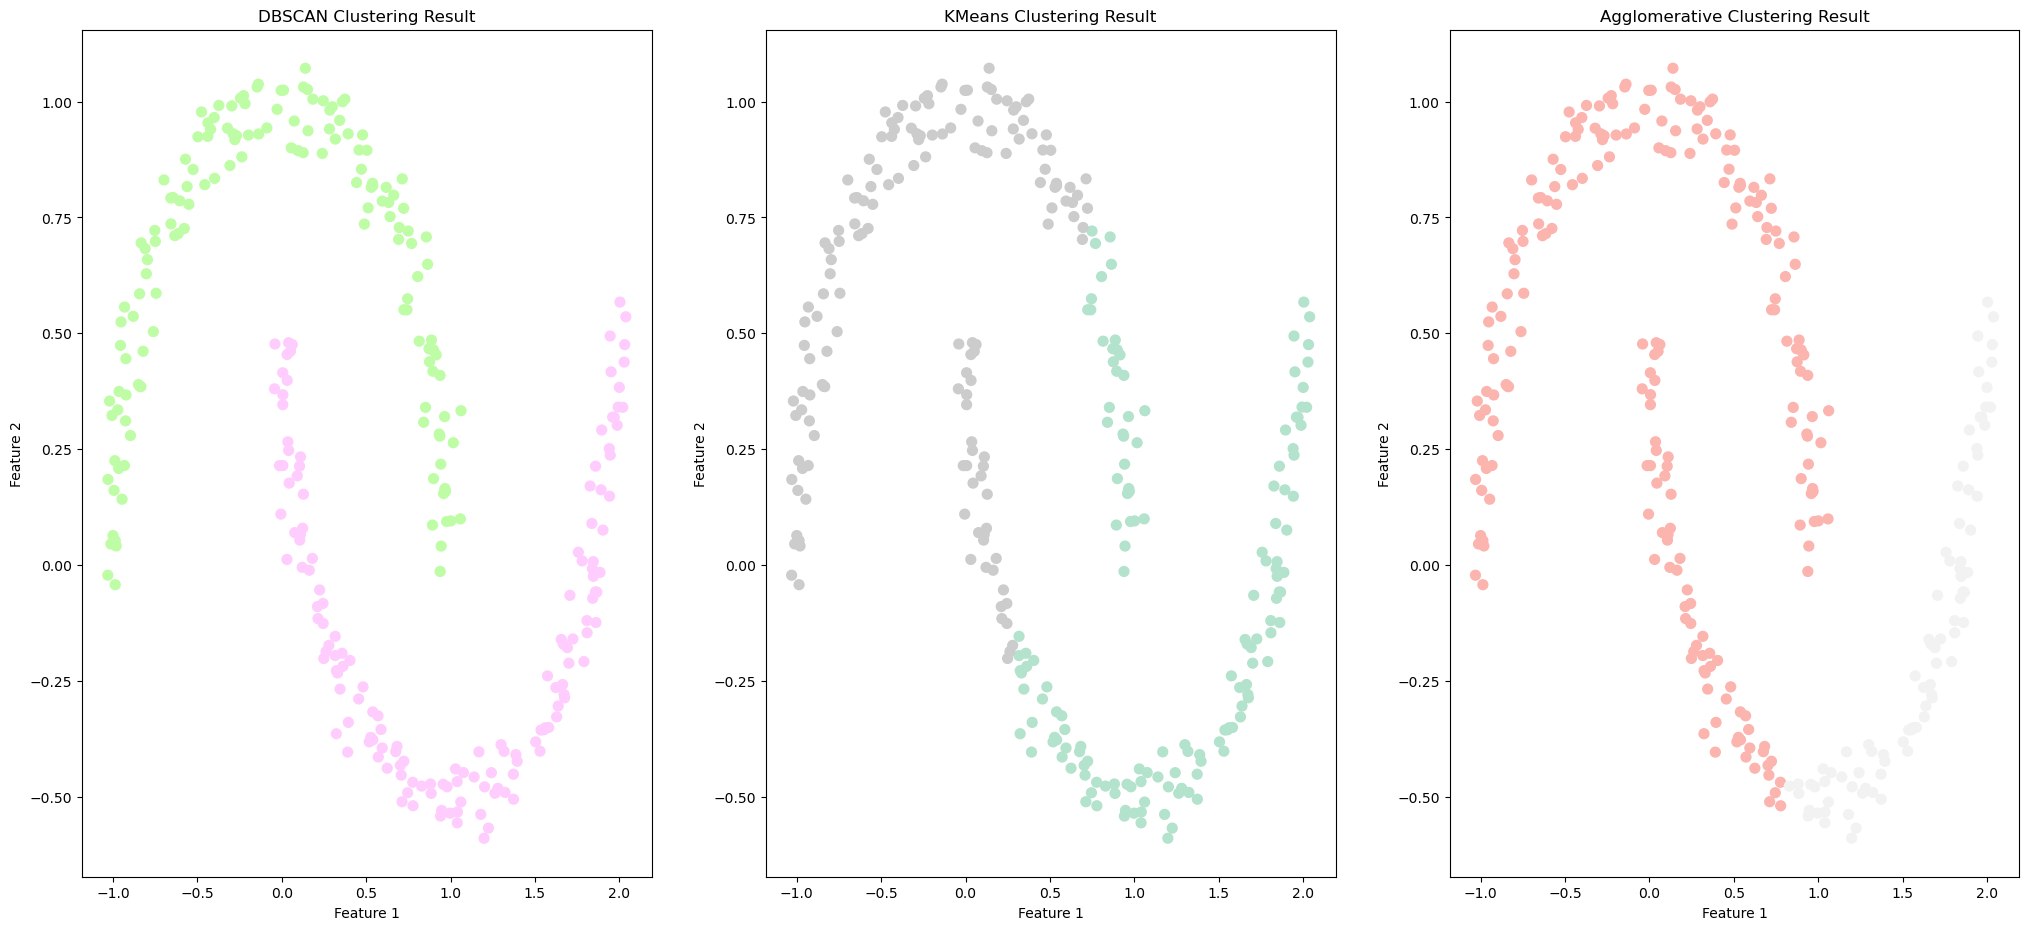

In [ ]:
# generate synthetic data
X, y = make_moons(n_samples = 300,
                  noise = 0.05, 
                  random_state = 27
                  )

# train models
y_dbscan, y_kmeans, y_agglo = train_models(X, 
                                           eps = 0.2, 
                                           n_clusters = 2, 
                                           linkage = 'ward')
# visualize models
visualize_models(X, y_dbscan, y_kmeans, y_agglo)

 

### Train and Visualize Models on Dataset Where DBSCAN Struggles

c:\Users\viole\Documents\School\ML-AI\BINF5507-Materials\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


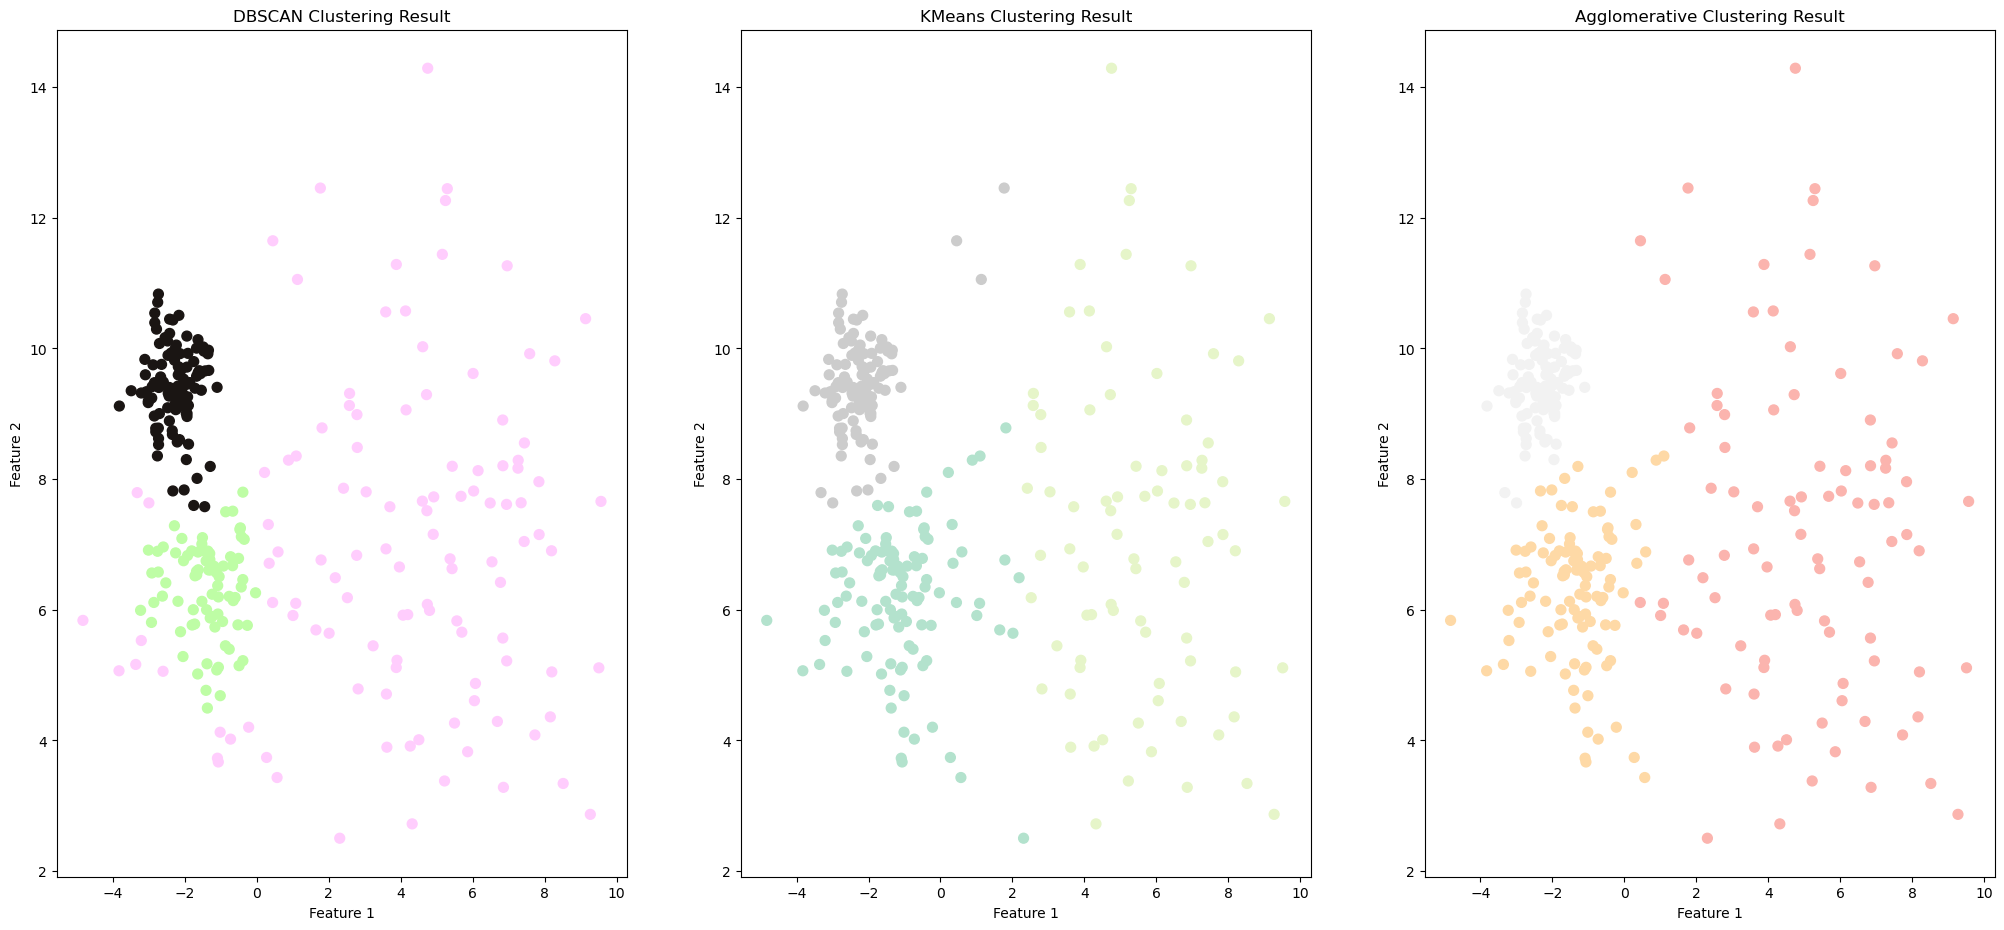

In [10]:
# generate synthetic data
X, y = make_blobs(n_samples = 300, 
                  centers = 3,
                  cluster_std = [1.0, 2.5, 0.5], 
                  random_state = 27)

# train models
y_dbscan, y_kmeans, y_agglo = train_models(X, 
                                           n_clusters = 3)

# visualize models
visualize_models(X, y_dbscan, y_kmeans, y_agglo)